In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('/content/rental.csv')

In [3]:
dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


 ## Basic Info of the Dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## EDA

In [8]:
import matplotlib.pyplot as plt

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

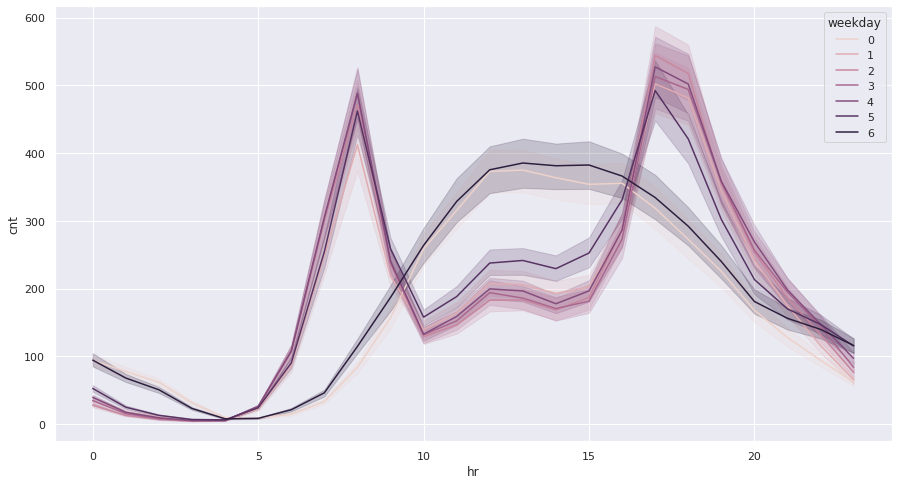

In [22]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="hr", y="cnt",
              hue='weekday',
             data=dataset)

What are the peak hours of rental during weekdays & weekends?

We can see during the evening hours i.e from 16-18 hrs of weekdays the rentals are really high , whereas during weekends we see the rentals picking up in the afternoon session , i.e 12-15 hrs.

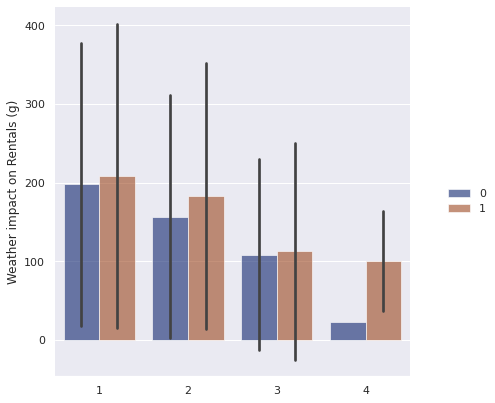

In [23]:
g = sns.catplot(
    data=dataset, kind="bar",
    x="weathersit", y="cnt", hue="workingday",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Weather impact on Rentals (g)")
g.legend.set_title("")

Does the climate affect rental?

Weather Legend


  * Clear, Few clouds, Partly cloudy, Partly cloudy
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog






Yes , Definetly ! The rentals are high when the weather is clear and cloudy , whereas during rain the rentals drop quite a bit . Interestingly , we don't see much difference when its light rain and heavy rain during the weekdays . But, drops sharply when its a holiday.


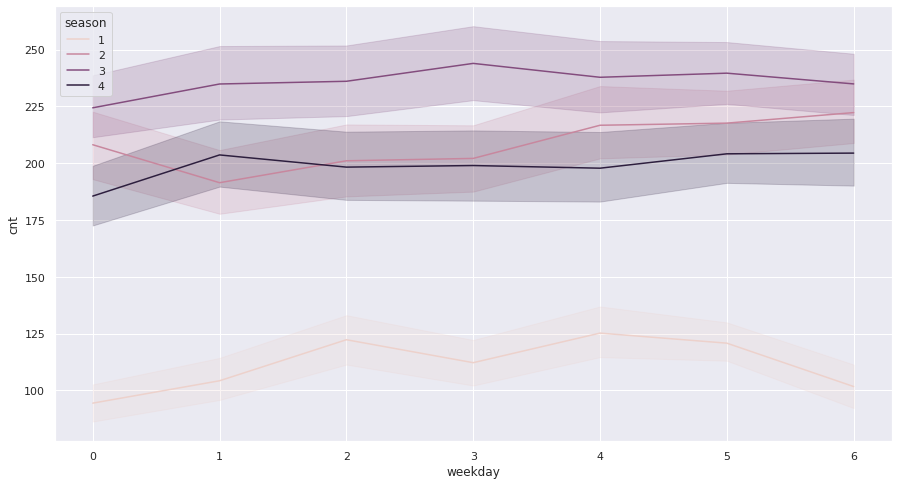

In [36]:
# Plot the responses for different events and regions
sns.lineplot(x="weekday", y="cnt",
              hue='season',
             data=dataset)

Which season has more rental over weekdays & weekends?

season (1:winter, 2:spring, 3:summer, 4:fall)

Yes , Season also impacts rentals and summer has most rentals on the weekdays compared to weekends

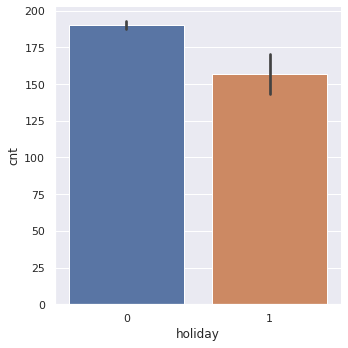

In [38]:
sns.set(rc={'figure.figsize':(11, 4)})
sns.catplot(x="holiday", y="cnt", kind="bar", data=dataset)

In [39]:
dataset.groupby(['holiday'])['cnt'].agg('sum')

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

In [40]:
3214244/ (3214244+78435) * 100

97.6178971591218

Do holidays increase the rental? 


Yes, It does not. (If taken 1 as holiday) .  

In [19]:
print(dataset.groupby(['weekday','hr'])['cnt'].agg('sum'))

weekday  hr
0        0      9775
         1      8053
         2      6286
         3      3239
         4       955
               ...  
6        19    24953
         20    18810
         21    16224
         22    14525
         23    12049
Name: cnt, Length: 168, dtype: int64


In [20]:
dataset.groupby(['season','weekday'])['cnt'].agg('sum')

season  weekday
1       0           60195
        1           63771
        2           69813
        3           65277
        4           72355
        5           74264
        6           65673
2       0          129650
        1          123255
        2          125449
        3          130547
        4          135207
        5          135792
        6          138689
3       0          138431
        1          146307
        2          152715
        3          158054
        4          159561
        5          155267
        6          150794
4       0          115751
        1          122170
        2          121132
        3          119170
        4          118272
        5          122467
        6          122651
Name: cnt, dtype: int64

In [16]:
dataset.groupby(['weathersit'])['cnt'].agg('sum')

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64